In [1]:
%load_ext autoreload
%autoreload 2
import sys

setupFlag = False ## Set flag to True if these aren't installed
if setupFlag:
    !{sys.executable} -m pip install astroquery
    ## https://github.com/astropy/astroquery
    !{sys.executable} -m pip install eleanor
    ## https://github.com/afeinstein20/eleanor
    !{sys.executable} -m pip install lightkurve
    ## https://github.com/KeplerGO/lightkurve
    !{sys.executable} -m pip install sncosmo

In [2]:
from useful_functions import *
from mpl_toolkits.axes_grid1 import make_axes_locatable
np.random.seed(27)
savePNG = True ## Changes matplotlib backend to save plots as pdf (default:True)
if savePNG:
    mpl.use("agg")
    plotExt = str('.png')
elif not savePNG:
    mpl.use("pgf")
    mpl.rcParams.update({
        "pgf.texsystem": "pdflatex",
        'font.family': 'serif',
        'text.usetex': True,
        'pgf.rcfonts': False,})
    plotExt = str('.pdf')

notebookPlotFlag = True ## Changes Jupyter plotting backend (default:True)
if notebookPlotFlag:
    %matplotlib notebook
elif not notebookPlotFlag:
    %matplotlib inline

gzip was not found on your system! You should solve this issue for astroquery.eso to be at its best!
On POSIX system: make sure gzip is installed and in your path!On Windows: same for 7-zip (http://www.7-zip.org)!


In [3]:
sn2020bpi_s21_dir = './Fausnaugh/sector21/cam3_ccd2/lc/lc_2020bpi_cleaned'
sn2020bpi_s21 = lcImport(sn2020bpi_s21_dir)
sn2020bpi_s21['cts_median'] = sn2020bpi_s21['cts'].rolling(24).median()
sn2020bpi_s21['e_cts_median'] = sn2020bpi_s21['e_cts'].rolling(24).median()
sn2020bpi_s21['mjd'] = Time(sn2020bpi_s21['BTJD']+2457000.0, format='jd').mjd

sn2020bpi_s22_dir = './Fausnaugh/sector22/cam3_ccd1/lc/lc_2020bpi_cleaned'
sn2020bpi_s22 = lcImport(sn2020bpi_s22_dir)
sn2020bpi_s22['cts_median'] = sn2020bpi_s22['cts'].rolling(24).median()
sn2020bpi_s22['e_cts_median'] = sn2020bpi_s22['e_cts'].rolling(24).median()
sn2020bpi_s22['mjd'] = Time(sn2020bpi_s22['BTJD']+2457000.0, format='jd').mjd

sn2020bpi_s22_fix = (1912,1914.5)
sn2020bpi_s22_fixed = sn2020bpi_s22.query('BTJD > 1900')
sn2020bpi_s22_fixed = sn2020bpi_s22_fixed[(sn2020bpi_s22_fixed['BTJD'] < sn2020bpi_s22_fix[0]) | (sn2020bpi_s22_fixed['BTJD'] > sn2020bpi_s22_fix[1])]


sn2020bpi_s21s22 = pd.concat([sn2020bpi_s21,sn2020bpi_s22_fixed])
sn2020bpi_s21s22['cts_bkg_model_sub'] = sn2020bpi_s21s22['cts'] - sn2020bpi_s21s22['bkg_model']

In [4]:
sn2020bpi_peak_iso = Time('2020-02-14', format='iso')
sn2020bpi_peak_btjd = sn2020bpi_peak_iso.jd - 2457000.0

<IPython.core.display.Javascript object>


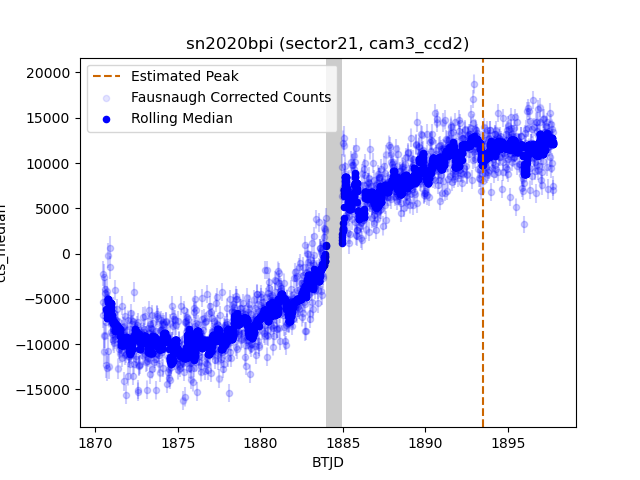

In [5]:
ax = sn2020bpi_s21.plot(x='BTJD', y='cts', yerr='e_cts',
                      color='blue', alpha=0.1, kind='scatter', label='Fausnaugh Corrected Counts')
sn2020bpi_s21.plot(x='BTJD', y='cts_median',
                color='blue',kind='scatter',ax=ax, label='Rolling Median')
plt.axvline(x=sn2020bpi_peak_btjd, color=(0.8,0.4,0), 
            linestyle='dashed', label='Estimated Peak')
plt.axvspan(sn2020bpi_s21['BTJD'][sn2020bpi_s21['BTJD'].diff().argmax()-1],
           sn2020bpi_s21['BTJD'][sn2020bpi_s21['BTJD'].diff().argmax()],
           facecolor='black',alpha=0.2)
plt.legend()
plt.title('sn2020bpi (sector21, cam3_ccd2)')
plt.show()
#display_side_by_side(sn2020bpi_s21)

<IPython.core.display.Javascript object>


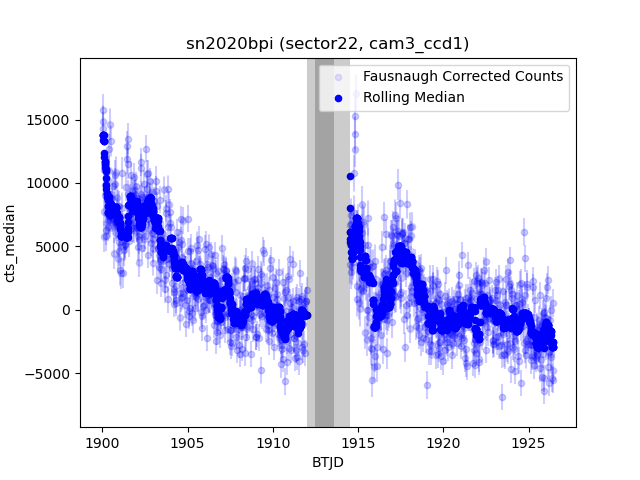

In [6]:
ax = sn2020bpi_s22_fixed.plot(x='BTJD', y='cts', yerr='e_cts',
                      color='blue', alpha=0.1, kind='scatter', label='Fausnaugh Corrected Counts')
sn2020bpi_s22_fixed.plot(x='BTJD', y='cts_median',
                color='blue',kind='scatter',ax=ax, label='Rolling Median')
plt.axvspan(sn2020bpi_s22['BTJD'][sn2020bpi_s22['BTJD'].diff().argmax()-1],
           sn2020bpi_s22['BTJD'][sn2020bpi_s22['BTJD'].diff().argmax()],
           facecolor='black',alpha=0.2)
plt.axvspan(sn2020bpi_s22_fix[0], ##See why this is needed at some point
           sn2020bpi_s22_fix[1],
           facecolor='black',alpha=0.2)
plt.legend()
plt.title('sn2020bpi (sector22, cam3_ccd1)')
plt.show()
#plt.savefig('sn2020bpi_s22_fixed.png')

<IPython.core.display.Javascript object>


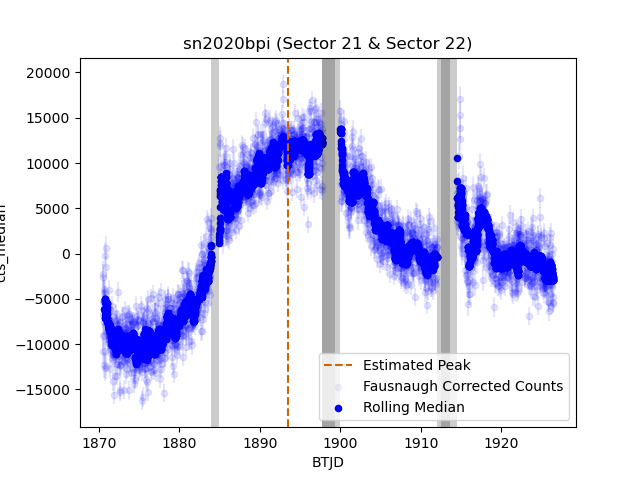

<function matplotlib.pyplot.show(*args, **kw)>

In [7]:
ax = sn2020bpi_s21s22.plot(x='BTJD', y='cts', yerr='e_cts',
                      color='blue', alpha=0.05, kind='scatter', label='Fausnaugh Corrected Counts')
sn2020bpi_s21s22.plot(x='BTJD', y='cts_median',
                color='blue',kind='scatter',ax=ax, label='Rolling Median')
plt.axvline(x=sn2020bpi_peak_btjd, color=(0.8,0.4,0), 
            linestyle='dashed', label='Estimated Peak')
plt.axvspan(sn2020bpi_s21['BTJD'][sn2020bpi_s21['BTJD'].diff().argmax()-1],
           sn2020bpi_s21['BTJD'][sn2020bpi_s21['BTJD'].diff().argmax()],
           facecolor='black',alpha=0.2)
plt.axvspan(sn2020bpi_s22['BTJD'][sn2020bpi_s22['BTJD'].diff().argmax()-1],
           sn2020bpi_s22['BTJD'][sn2020bpi_s22['BTJD'].diff().argmax()],
           facecolor='black',alpha=0.2)
plt.axvspan(sn2020bpi_s22_fix[0],
           sn2020bpi_s22_fix[1],
           facecolor='black',alpha=0.2)
plt.axvspan(sn2020bpi_s21['BTJD'].iloc[-1],
           sn2020bpi_s22['BTJD'].iloc[0],
           facecolor='black',alpha=0.2)
plt.axvspan(sn2020bpi_s21['BTJD'].iloc[-1],
           sn2020bpi_s22_fixed['BTJD'].iloc[0],
           facecolor='black',alpha=0.2)
plt.legend()
plt.title('sn2020bpi (Sector 21 & Sector 22)')
plt.show

In [8]:
def cts_sub_bkg_pen(params,subItem):
    return (sn2020bpi_s21s22['cts']-(params[0]*sn2020bpi_s21s22[np.str(subItem)]+params[1])
            /sn2020bpi_s21s22['e_cts'])
## Getting weird error: "TypeError: cts_sub_bkg_pen() takes 2 positional arguments but 10 were given"
# cts_bkg_scale_params = optimize.least_squares(cts_sub_bkg_pen,x0=[10,1000],args=('bkg_model'))

In [9]:
ab = sncosmo.get_magsystem('ab')
tess_response = pd.read_csv('./tess_response_curve.csv',header=0,names=['wl_nm','trans'])
tess_response['wl_ang'] = (np.array(tess_response['wl_nm']) * u.nm).to_value('angstrom')

atlaso_response = pd.read_csv('./atlas_o.csv',header=0,names=['wl_ang','trans'])


sn2020bpi_ztf = pd.read_csv('./sn2020bpi_ztf.csv',header=0)
sn2020bpi_ztf['BTJD'] = Time(sn2020bpi_ztf['mjd'],format='mjd').jd - 2457000.0
sn2020bpi_ztf['magap_rolling'] = sn2020bpi_ztf['magap'].rolling(12).median()
sn2020bpi_ztf['flux'] = [ab.band_mag_to_flux(sn2020bpi_ztf['magap'][i], 'ztfr') for i in range(len(sn2020bpi_ztf['magap']))]
sn2020bpi_ztf['flux_rolling'] = sn2020bpi_ztf['flux'].rolling(12).median()
#sn2020bpi_ztf['sig_flux'] = [ab.band_mag_to_flux(sn2020bpi_ztf['sigmagap'][i], 'ztfr') for i in range(len(sn2020bpi_ztf['sigmagap']))]
## Sig Flux is wrong
sn2020bpi_atlas = pd.read_csv('./sn2020bpi_atlas.csv',header=0)
sn2020bpi_atlas.replace(to_replace='orange-ATLAS',value='orange',inplace=True) ## covers 560-820 nm (closest to tess)
sn2020bpi_atlas.replace(to_replace='cyan-ATLAS',value='cyan',inplace=True) ## covers 420-650 nm
atlas_o = sn2020bpi_atlas[sn2020bpi_atlas.FLT == 'orange']
#sn2020bpi_atlas
# sn2020bpi_ztf

In [10]:
ztfmag_err = [(magap+sigmagap, ## lower uncertainty
          magap-sigmagap) ## upper uncertainty
          for magap,sigmagap in zip(sn2020bpi_ztf['magap'],sn2020bpi_ztf['sigmagap'])]

sn2020bpi_ztf['sigflux'] = [(np.abs(ab.band_mag_to_flux(fluxErr[0], 'ztfr')-flux),
                                np.abs(ab.band_mag_to_flux(fluxErr[1], 'ztfr')-flux))
                           for fluxErr,flux in zip(ztfmag_err,sn2020bpi_ztf['flux'])]


In [11]:
tess_band = sncosmo.Bandpass(tess_response['wl_ang'],tess_response['trans'],name='tess')
sncosmo.register(tess_band,force=True)

atlaso_band = sncosmo.Bandpass(atlaso_response['wl_ang'],atlaso_response['trans'],name='atlaso')
sncosmo.register(atlaso_band,force=True)

In [12]:
tess_interval = (((sn2020bpi_s21s22[sn2020bpi_s21s22.index % 2 !=0]['BTJD'].max() - sn2020bpi_s21s22[sn2020bpi_s21s22.index % 2 !=0]['BTJD'].min())/len(sn2020bpi_s21s22[sn2020bpi_s21s22.index % 2 !=0]['BTJD']))*u.d).to_value('s')
tess_area = np.pi * 5.25**2 ## unsure about correct value, doesn't necessarily matter
#tess_zeroed_counts = sn2020bpi_s21s22['cts']#+abs(sn2020bpi_s21s22['cts'].min())+1e-53
tess_flux = np.array(sn2020bpi_s21s22['cts'] / tess_interval / tess_area)
tess_flux_error = np.array(sn2020bpi_s21s22['e_cts'] / tess_interval / tess_area)
sn2020bpi_s21s22['flux'] = tess_flux
sn2020bpi_s21s22['flux_error'] = tess_flux_error
sn2020bpi_s21s22['bkg_model_flux'] = np.array(sn2020bpi_s21s22['bkg_model'] / tess_interval / tess_area)
sn2020bpi_s21s22['flux_bkg_model_sub'] = sn2020bpi_s21s22['flux'] - sn2020bpi_s21s22['bkg_model_flux']
#np.array(sn2020bpi_s21s22['cts_bkg_model_sub'] / tess_interval / tess_area)
#display_side_by_side(sn2020bpi_s21s22)

In [41]:
sn2020bpi_ztf.query('mjd < 58893').query('fid == 2')

,candid_str,oid,candid,mjd,fid,diffmaglim,magpsf,magap,sigmapsf,sigmagap,...,magap_corr,sigmapsf_corr,sigmagap_corr,has_stamps,parent_candid,BTJD,magap_rolling,flux,flux_rolling,sigflux
2,1125370563515015015,ZTF20aakyoez,1125370563515015000,58879.370567,2,19.776472,19.855816,19.729799,0.204931,0.2218,...,19.729799,0.204931,0.2218,True,-1,1879.870567,NaN,0.014224,NaN,"(0.002628163767600394, 0.003223832161130714)"
7,1126511063515015024,ZTF20aakyoez,1126511063515015000,58880.511065,2,20.487232,19.964785,19.959801,0.164575,0.2436,...,19.959801,0.164575,0.2436,True,-1,1881.011065,NaN,0.011509,NaN,"(0.0023129338055085068, 0.0028946976073013723)"
8,1126531344715015006,ZTF20aakyoez,1126531344715015000,58880.531343,2,20.438313,19.715601,19.473101,0.135039,0.1538,...,19.473101,0.135039,0.1538,True,-1,1881.031343,NaN,0.018018,NaN,"(0.0023797689104727814, 0.002741920034638759)"
9,1127343853515015018,ZTF20aakyoez,1127343853515015000,58881.343854,2,20.182983,19.570827,19.660400,0.129240,0.2291,...,19.660400,0.129240,0.2291,True,-1,1881.843854,NaN,0.015163,NaN,"(0.0028844699689605166, 0.003562099310207071)"
14,1127532543515015023,ZTF20aakyoez,1127532543515015000,58881.532546,2,20.515289,19.441839,19.363001,0.101700,0.1425,...,19.363001,0.101700,0.1425,True,-1,1882.032546,19.566751,0.019941,0.016590,"(0.00245268546717093, 0.0027966740782900297)"
15,1127560064715015007,ZTF20aakyoez,1127560064715015000,58881.560069,2,20.575121,19.434374,19.489201,0.116765,0.1532,...,19.489201,0.116765,0.1532,True,-1,1882.060069,19.481151,0.017753,0.017885,"(0.0023362237266854775, 0.002690261091044685)"
16,1127561444715015009,ZTF20aakyoez,1127561444715015000,58881.561447,2,20.528898,19.439356,19.475000,0.145500,0.1531,...,19.475000,0.145500,0.1531,True,-1,1882.061447,19.474051,0.017986,0.018002,"(0.0023655409222016355, 0.002723770205617211)"
19,1129526784715015012,ZTF20aakyoez,1129526784715015000,58883.526782,2,20.038704,18.780468,18.779900,0.094575,0.0910,...,18.779900,0.094575,0.0910,True,-1,1884.026782,19.398650,0.034118,0.019307,"(0.0027429906947237653, 0.0029828013678331114)"
20,1129527703515015016,ZTF20aakyoez,1129527703515015000,58883.527708,2,19.906738,18.763758,18.822901,0.151218,0.1007,...,18.822901,0.151218,0.1007,True,-1,1884.027708,19.363351,0.032793,0.019934,"(0.0029046946519563493, 0.003186988412882466)"
25,1130505093515015012,ZTF20aakyoez,1130505093515015000,58884.505093,2,19.861660,18.541243,18.585899,0.084863,0.0832,...,18.585899,0.084863,0.0832,True,-1,1885.005093,18.775050,0.040792,0.034271,"(0.0030091616616509873, 0.0032488190281379503)"


<IPython.core.display.Javascript object>


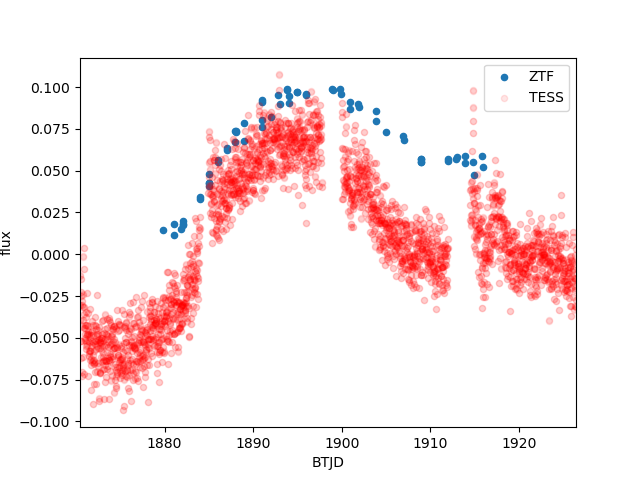

In [13]:
ax = sn2020bpi_ztf.query('fid ==2').plot(x='BTJD',y='flux', 
                        xlim=(sn2020bpi_s21s22['BTJD'].min(), sn2020bpi_s21s22['BTJD'].max()), 
                        kind='scatter',label='ZTF')
#sn2020bpi_s21s22['temp'] = 2* sn2020bpi_s21s22['flux'] +.06
sn2020bpi_s21s22.plot(x='BTJD',y='flux', 
                        xlim=(sn2020bpi_s21s22['BTJD'].min(), sn2020bpi_s21s22['BTJD'].max()), 
                        color='red',alpha=0.1,kind='scatter',label='TESS',ax=ax)

#sn2020bpi_ztf.plot(x='BTJD',y='flux_rolling',  kind='scatter',ax=ax)

In [14]:
def interp_mjd(data,argData,data_index='time',arg_index='time'):
    ## More generalized version of interpToMatch(). Takes an argument for a reference
    ## DataFrame and a variable number of DataFrames to be interpolated so that
    ## they match the time sampling of the reference DataFrame. Like interpToMatch(),
    ## DataFrames must have a 'time' column of an integer or float type.
    ## Function returns an array containing the reference DataFrame as the first
    ## item followed by the interpolated DataFrames in the order in which they were
    ## passed to the function
    interpArray = []
    interpArray.append(data)
    
    data_indexed = data.set_index(str(data_index))
    data_length = len(data_indexed.index)
    minun = data_indexed.index.min()
    plusle = data_indexed.index.max()
    newIndex = data_indexed.index
    
    arg_indexed = argData.set_index(str(arg_index))
    arg_interp = pd.DataFrame(index=newIndex)
    arg_interp.index.name = arg_indexed.index.name
    for colname, col in arg_indexed.iteritems():
        arg_interp[colname] = np.interp(newIndex,arg_indexed.index,col)
    arg_interp.reset_index(inplace=True)
    return arg_interp

In [15]:
tess_start_mjd = sn2020bpi_s21s22['mjd'].min()
tess_end_mjd = sn2020bpi_s21s22['mjd'].max()
sn2020bpi_ztf_r = sn2020bpi_ztf.query('fid == 2 & mjd > @tess_start_mjd & mjd < @tess_end_mjd').reset_index()
sn2020bpi_s21s22_even = sn2020bpi_s21s22[sn2020bpi_s21s22.index % 2 !=0]
sn2020bpi_s21s22_odd = sn2020bpi_s21s22[sn2020bpi_s21s22.index % 2 ==0]
sn2020bpi_s21s22_interpolated = interp_mjd(data=sn2020bpi_ztf_r,
                                            argData=sn2020bpi_s21s22_even,data_index='mjd', arg_index='mjd')
# sn2020bpi_s21s22_interpolated
# sn2020bpi_ztf_limited

In [16]:
def sn2020bpi_flux_scale(params, fluxType, timeMin=0,timeMax=0):
    if timeMin !=0 and timeMax !=0:
        return (sn2020bpi_ztf_r[(sn2020bpi_ztf_r.BTJD > timeMin) & (sn2020bpi_ztf_r.BTJD <timeMax)][np.str('flux')] - 
                (params[0]*sn2020bpi_s21s22_interpolated[(sn2020bpi_ztf_r.BTJD > timeMin) & 
                                                         (sn2020bpi_ztf_r.BTJD <timeMax)][np.str(fluxType)] + params[1]))
    elif timeMin ==0 and timeMax ==0:
        return ((sn2020bpi_ztf_r[np.str('flux')]) - 
                (params[0]*sn2020bpi_s21s22_interpolated[np.str(fluxType)]+ params[1]))
    
fluxOptParams = optimize.least_squares(sn2020bpi_flux_scale, x0=[0.3,.05],args=('flux',0,0))
fluxOptParams_s21 = optimize.least_squares(sn2020bpi_flux_scale, x0=[0.3,.05],
                                       args=('flux',
                                             sn2020bpi_s21s22_interpolated['BTJD'].min(),
                                             sn2020bpi_s22_fixed['BTJD'].min()))
fluxOptParams_s21a = optimize.least_squares(sn2020bpi_flux_scale, x0=[0.3,.05],
                                       args=('flux',
                                             sn2020bpi_s21s22_interpolated['BTJD'].min(),
                                             1884))
fluxOptParams_s21b = optimize.least_squares(sn2020bpi_flux_scale, x0=[0.3,.05],
                                       args=('flux',
                                             sn2020bpi_s22_fixed['BTJD'].min(),
                                             1884))
fluxOptParams_s22 = optimize.least_squares(sn2020bpi_flux_scale, x0=[0.3,.05],
                                       args=('flux',
                                             sn2020bpi_s22_fixed['BTJD'].min(),
                                             1912))

fluxOptParams_bkg_s21 = optimize.least_squares(sn2020bpi_flux_scale, x0=[0.3,.05],
                                       args=('flux_bkg_model_sub',
                                             sn2020bpi_s21s22_interpolated['BTJD'].min(),
                                             sn2020bpi_s22_fixed['BTJD'].min()))
fluxOptParams_bkg_s22 = optimize.least_squares(sn2020bpi_flux_scale, x0=[0.3,.05],
                                       args=('flux_bkg_model_sub',
                                             sn2020bpi_s22_fixed['BTJD'].min(),
                                             1912))

In [17]:
sn2020bpi_tess_flux_fit = pd.DataFrame()
sn2020bpi_tess_flux_fit['mjd'] = sn2020bpi_s21s22_interpolated['mjd']
sn2020bpi_tess_flux_fit['flux'] = fluxOptParams.x[0]*sn2020bpi_s21s22_interpolated['flux'] + fluxOptParams.x[1]
sn2020bpi_tess_flux_2fit_s21 =pd.Series(fluxOptParams_s21.x[0]*
                                        sn2020bpi_s21s22_interpolated[(sn2020bpi_ztf_r.BTJD<1900)]['flux']+
                                        fluxOptParams_s21.x[1])
sn2020bpi_tess_flux_2fit_s22 =pd.Series(fluxOptParams_s22.x[0]*
                                        sn2020bpi_s21s22_interpolated[(sn2020bpi_ztf_r.BTJD>1900)]['flux']+
                                        fluxOptParams_s22.x[1])

sn2020bpi_tess_flux_3fit_s21a =pd.Series(fluxOptParams_s21.x[0]*
                                        sn2020bpi_s21s22_interpolated[(sn2020bpi_ztf_r.BTJD<1885)]['flux']+
                                        fluxOptParams_s21.x[1])
sn2020bpi_tess_flux_3fit_s21b =pd.Series(fluxOptParams_s21.x[0]*
                                        sn2020bpi_s21s22_interpolated[(sn2020bpi_ztf_r.BTJD>1885) & (sn2020bpi_ztf_r.BTJD<1900)]['flux']+
                                        fluxOptParams_s21.x[1])

sn2020bpi_tess_flux_fit['flux_2fit'] = pd.concat([sn2020bpi_tess_flux_2fit_s21,sn2020bpi_tess_flux_2fit_s22],
                                                ignore_index=True)
sn2020bpi_tess_flux_fit['flux_3fit'] = pd.concat([sn2020bpi_tess_flux_3fit_s21a,sn2020bpi_tess_flux_3fit_s21b,sn2020bpi_tess_flux_2fit_s22],
                                                ignore_index=True)

In [18]:
def quadrat(x,a,b,c):
    return a*(x**2) + b*x + c

sn2020bpi_ztf_r_curve_params, sn2020bpi_ztf_r_curve_cov= optimize.curve_fit(quadrat,
                                              (sn2020bpi_ztf_r['mjd']-sn2020bpi_ztf_r['mjd'].min()),
                                              sn2020bpi_ztf_r['flux'])

sn2020bpi_ztf_r['curvefit'] = quadrat((sn2020bpi_ztf_r['mjd']-sn2020bpi_ztf_r['mjd'].min()), 
                                      sn2020bpi_ztf_r_curve_params[0], 
                                      sn2020bpi_ztf_r_curve_params[1], 
                                      sn2020bpi_ztf_r_curve_params[2])

<IPython.core.display.Javascript object>


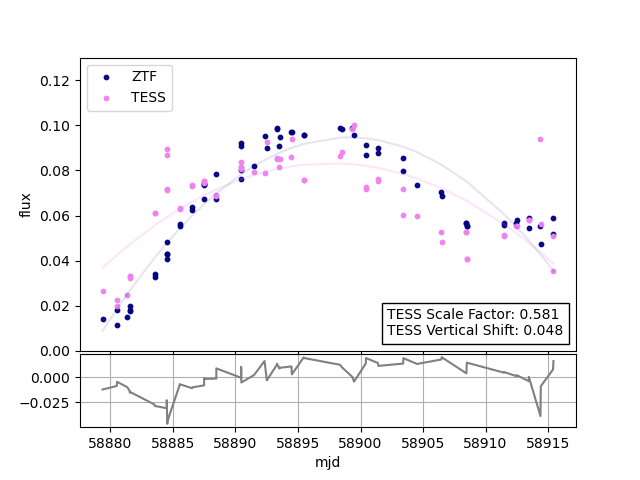

58899.3483564998 58898.364583300005 0.9837731997977244
0.09896918552955393 0.09993103765222877 -0.0009618521226748417
58898.364583300005 58899.4774074 -1.112824099996942


In [19]:
sn2020bpi_tess_flux_fit_curve_params, sn2020bpi_flux_fit_curve_cov = optimize.curve_fit(quadrat,
                                                  (sn2020bpi_tess_flux_fit['mjd']-sn2020bpi_tess_flux_fit['mjd'].min()),
                                                  sn2020bpi_tess_flux_fit['flux'])
sn2020bpi_tess_flux_fit['curvefit'] = quadrat((sn2020bpi_tess_flux_fit['mjd']-sn2020bpi_tess_flux_fit['mjd'].min()), 
                                      sn2020bpi_tess_flux_fit_curve_params[0], 
                                      sn2020bpi_tess_flux_fit_curve_params[1], 
                                      sn2020bpi_tess_flux_fit_curve_params[2])

ax = sn2020bpi_ztf_r.plot(x='mjd',y='flux', 
                          ylim=(0,0.13),kind='scatter',s=10,color='navy', alpha=0.95,
                          label='ZTF')

sn2020bpi_ztf_r.plot(x='mjd',y='curvefit', kind='line',color='navy',alpha=0.1,label='_nolegend_',ax=ax)
# ax.axvline(x=sn2020bpi_ztf_r['mjd'][sn2020bpi_ztf_r['curvefit'].argmax()], color='blue', 
#             linestyle='dashed', alpha=0.1,label='_nolegend_')

sn2020bpi_tess_flux_fit.plot(x='mjd',y='flux',  
                        kind='scatter',s=10,color='violet',alpha=0.95,
                             label='TESS',ax=ax)
sn2020bpi_tess_flux_fit.plot(x='mjd',y='curvefit', kind='line',color='violet',alpha=0.2,label='_nolegend_',ax=ax)
# ax.axvline(x=sn2020bpi_tess_flux_fit['mjd'][sn2020bpi_tess_flux_fit['curvefit'].argmax()], color='red', 
#             linestyle='dashed', alpha=0.1,label='_nolegend_')

divider = make_axes_locatable(ax)

ax2 = divider.append_axes("bottom",size="25%",pad=0.03)
ax.figure.add_axes(ax2)
ax2.plot(sn2020bpi_tess_flux_fit['mjd'],
        sn2020bpi_ztf_r['flux']-sn2020bpi_tess_flux_fit['flux'],color='grey')
ax2.grid()
plt.xlabel("mjd")
anchText1 = mpl.offsetbox.AnchoredText('TESS Scale Factor: '+np.str(np.around(fluxOptParams.x[0],3))+
         '\n'+'TESS Vertical Shift: '+np.str(np.around(fluxOptParams.x[1],3)),loc=4)
ax.add_artist(anchText1)
ax.legend(loc=2)

#plt.savefig(fname='ZTF_TESS_Flux_Interpolation_Scaling(NoCurve)300.png',dpi=300)

print(sn2020bpi_ztf_r['mjd'][sn2020bpi_ztf_r['curvefit'].argmax()],
sn2020bpi_tess_flux_fit['mjd'][sn2020bpi_tess_flux_fit['curvefit'].argmax()],
     sn2020bpi_ztf_r['mjd'][sn2020bpi_ztf_r['curvefit'].argmax()]-
sn2020bpi_tess_flux_fit['mjd'][sn2020bpi_tess_flux_fit['curvefit'].argmax()])
print(sn2020bpi_ztf_r['flux'].max(),
     sn2020bpi_tess_flux_fit['flux'].max(),
     sn2020bpi_ztf_r['flux'].max()-
     sn2020bpi_tess_flux_fit['flux'].max())
print(sn2020bpi_ztf_r['mjd'][sn2020bpi_ztf_r['flux'].argmax()],
     sn2020bpi_tess_flux_fit['mjd'][sn2020bpi_tess_flux_fit['flux'].argmax()],
     sn2020bpi_ztf_r['mjd'][sn2020bpi_ztf_r['flux'].argmax()]-
     sn2020bpi_tess_flux_fit['mjd'][sn2020bpi_tess_flux_fit['flux'].argmax()])

<IPython.core.display.Javascript object>


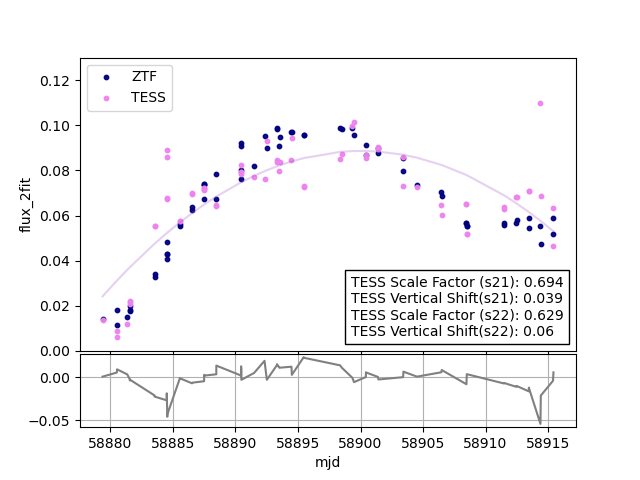

In [20]:
sn2020bpi_tess_flux_fit_curve_params, sn2020bpi_flux_fit_curve_cov = optimize.curve_fit(quadrat,
                                                  (sn2020bpi_tess_flux_fit['mjd']-sn2020bpi_tess_flux_fit['mjd'].min()),
                                                  sn2020bpi_tess_flux_fit['flux_2fit'])
sn2020bpi_tess_flux_fit['curvefit'] = quadrat((sn2020bpi_tess_flux_fit['mjd']-sn2020bpi_tess_flux_fit['mjd'].min()), 
                                      sn2020bpi_tess_flux_fit_curve_params[0], 
                                      sn2020bpi_tess_flux_fit_curve_params[1], 
                                      sn2020bpi_tess_flux_fit_curve_params[2])

ax = sn2020bpi_ztf_r.plot(x='mjd',y='flux', 
                          ylim=(0,0.13),kind='scatter',s=10,color='navy', alpha=0.95,
                          label='ZTF')

sn2020bpi_tess_flux_fit.plot(x='mjd',y='curvefit', kind='line',color='navy',alpha=0.1,label='_nolegend_',ax=ax)
# ax.axvline(x=sn2020bpi_ztf_r['mjd'][sn2020bpi_ztf_r['curvefit'].argmax()], color='blue', 
#             linestyle='dashed', alpha=0.1,label='_nolegend_')

sn2020bpi_tess_flux_fit.plot(x='mjd',y='flux_2fit',  
                        kind='scatter',s=10,color='violet',alpha=0.95,
                             label='TESS',ax=ax)
sn2020bpi_tess_flux_fit.plot(x='mjd',y='curvefit', kind='line',color='violet',alpha=0.2,label='_nolegend_',ax=ax)
# ax.axvline(x=sn2020bpi_tess_flux_fit['mjd'][sn2020bpi_tess_flux_fit['curvefit'].argmax()], color='red', 
#             linestyle='dashed', alpha=0.1,label='_nolegend_')

divider = make_axes_locatable(ax)

ax2 = divider.append_axes("bottom",size="25%",pad=0.03)
ax.figure.add_axes(ax2)
ax2.plot(sn2020bpi_tess_flux_fit['mjd'],
        sn2020bpi_ztf_r['flux']-sn2020bpi_tess_flux_fit['flux_2fit'],color='grey')
ax2.grid()
plt.xlabel("mjd")


anchText_2fit = mpl.offsetbox.AnchoredText(np.str('TESS Scale Factor (s21): '+
                                                  np.str(np.around(fluxOptParams_s21.x[0],3))+
                                                  '\n'+'TESS Vertical Shift(s21): '+
                                                  np.str(np.around(fluxOptParams_s21.x[1],3))+
                                                  '\n'+'TESS Scale Factor (s22): '+
                                                  np.str(np.around(fluxOptParams_s22.x[0],3))+
                                                  '\n'+'TESS Vertical Shift(s22): '+
                                                  np.str(np.around(fluxOptParams_s22.x[1],3))),loc=4)
ax.add_artist(anchText_2fit)
ax.legend(loc=2)
#plt.savefig(fname='ZTF_TESS_Flux_Interpolation_Sectored_Scaling300.png',dpi=300)

In [21]:
sn2020bpi_s21s22['flux_scaled'] = fluxOptParams.x[0]* sn2020bpi_s21s22['flux'] + fluxOptParams.x[1]

end_of_s21 = sn2020bpi_s21['BTJD'].max()
s22_start = sn2020bpi_s22_fixed['BTJD'].min()
sn2020bpi_s21_scaled_flux =pd.Series(fluxOptParams_s21.x[0]*
                                        sn2020bpi_s21s22[sn2020bpi_s21s22.BTJD<1900]['flux']+
                                        fluxOptParams_s21.x[1])
sn2020bpi_s22_scaled_flux =pd.Series(fluxOptParams_s22.x[0]*
                                        sn2020bpi_s21s22[sn2020bpi_s21s22.BTJD>1900]['flux']+
                                        fluxOptParams_s22.x[1])

sn2020bpi_s21a_scaled_flux =pd.Series(fluxOptParams_s21a.x[0]*
                                        sn2020bpi_s21s22[sn2020bpi_s21s22.BTJD<1885]['flux']+
                                        fluxOptParams_s21a.x[1])
sn2020bpi_s21b_scaled_flux =pd.Series(fluxOptParams_s21b.x[0]*
                                        sn2020bpi_s21s22[(sn2020bpi_s21s22.BTJD>1885) & (sn2020bpi_s21s22.BTJD<1900)]['flux']+
                                        fluxOptParams_s21b.x[1])
sn2020bpi_s21_scaled_flux_bkg_model_sub =pd.Series(fluxOptParams_bkg_s21.x[0]*
                                        sn2020bpi_s21s22[sn2020bpi_s21s22.BTJD<1900]['flux_bkg_model_sub']+
                                        fluxOptParams_bkg_s21.x[1])
sn2020bpi_s22_scaled_flux_bkg_model_sub =pd.Series(fluxOptParams_bkg_s22.x[0]*
                                        sn2020bpi_s21s22[sn2020bpi_s21s22.BTJD>1900]['flux_bkg_model_sub']+
                                        fluxOptParams_bkg_s22.x[1])
## Temp version that isn't actually the one fitting to ZTF


sn2020bpi_s21s22['flux_scaled_2fit'] = pd.concat([sn2020bpi_s21_scaled_flux,sn2020bpi_s22_scaled_flux])
sn2020bpi_s21s22['flux_bkg_model_sub_scaled_2fit'] = pd.concat([sn2020bpi_s21_scaled_flux_bkg_model_sub,
                                                                sn2020bpi_s22_scaled_flux_bkg_model_sub])
sn2020bpi_s21s22['flux_scaled_3fit'] = pd.concat([sn2020bpi_s21a_scaled_flux,sn2020bpi_s21b_scaled_flux,sn2020bpi_s22_scaled_flux])

<IPython.core.display.Javascript object>


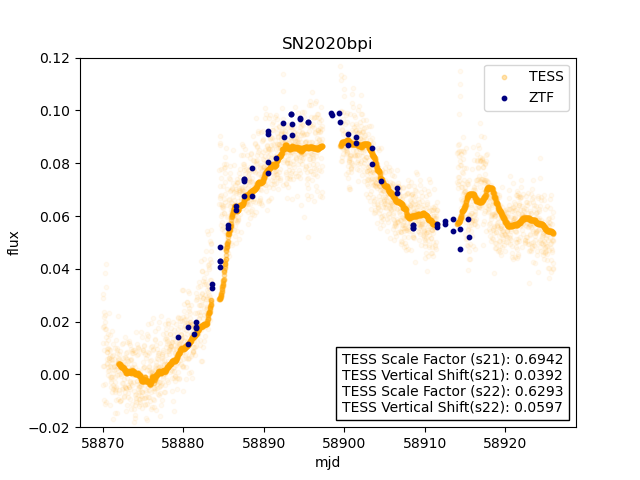

,BTJD,TJD,cts,e_cts,bkg,bkg_model,bkg2,e_bkg2,cts_median,e_cts_median,mjd,cts_bkg_model_sub,flux,flux_error,bkg_model_flux,flux_bkg_model_sub,flux_scaled,flux_scaled_2fit,flux_bkg_model_sub_scaled_2fit,flux_scaled_3fit
0,1870.44408,1870.43788,-5339.0302,1368.8706,-63381.0890,1502.1435,4466.8645,1368.8706,NaN,NaN,58869.94408,-6841.1737,-0.030663,0.007862,0.008627,-0.039290,0.029925,0.017962,0.003766,0.017575
2,1870.46491,1870.45871,-6841.1413,1375.3282,-60025.0642,1502.1435,-1132.7160,1375.3282,NaN,NaN,58869.96491,-8343.2848,-0.039290,0.007899,0.008627,-0.047917,0.024910,0.011973,-0.004082,0.015678
4,1870.48574,1870.47954,-2219.7583,1400.7610,-54125.0260,1501.2344,3038.3737,1400.7610,NaN,NaN,58869.98574,-3720.9927,-0.012748,0.008045,0.008622,-0.021370,0.040341,0.030399,0.020070,0.021514
6,1870.50658,1870.50038,-10843.6913,1370.6601,-58992.6986,1501.2344,-1349.6968,1370.6601,NaN,NaN,58870.00658,-12344.9257,-0.062277,0.007872,0.008622,-0.070899,0.011546,-0.003985,-0.024992,0.010623
8,1870.52741,1870.52121,-9069.4821,1365.9754,-65639.4792,1501.2344,3397.6044,1365.9754,NaN,NaN,58870.02741,-10570.7165,-0.052088,0.007845,0.008622,-0.060710,0.017470,0.003089,-0.015721,0.012864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2482,1926.38043,1926.37535,-5376.2935,1103.0225,-1055.4151,-1019.9026,-1019.9026,1103.0225,-2651.36315,1087.69125,58925.88043,-4356.3909,-0.030877,0.006335,-0.005857,-0.025020,0.029801,0.040299,0.045522,0.040299
2484,1926.40126,1926.39619,-2451.5298,1092.4653,1309.8629,-1019.9026,-689.4365,1092.4653,-2930.28905,1087.69125,58925.90126,-1431.6272,-0.014080,0.006274,-0.005857,-0.008222,0.039567,0.050869,0.056603,0.050869
2486,1926.42209,1926.41702,-4802.3999,1094.4606,912.7634,-1019.9026,-3345.9325,1094.4606,-2930.28905,1089.14140,58925.92209,-3782.4973,-0.027581,0.006286,-0.005857,-0.021724,0.031717,0.042373,0.047696,0.042373
2488,1926.44293,1926.43785,-5526.9100,1078.8450,-496.4184,-1019.9026,-971.0911,1078.8450,-2930.28905,1090.76515,58925.94293,-4507.0074,-0.031742,0.006196,-0.005857,-0.025885,0.029298,0.039755,0.044951,0.039755


In [22]:

ax = sn2020bpi_s21s22[::2].plot(x='mjd',y='flux_scaled_2fit',  
                        color='orange',alpha=0.05,kind='scatter',s=10)
ax.set_ylim(-0.02,0.12)
ax.scatter(sn2020bpi_s21s22[::2]['mjd'], sn2020bpi_s21s22[::2]['flux_scaled_2fit'].rolling(96).median(),
           color='orange',alpha=0.3,s=10,label='TESS')
sn2020bpi_ztf_r.plot(x='mjd',y='flux',color='navy',  
                        kind='scatter',s=10,label='ZTF',ax=ax)
plt.legend()
anchText_2fit = mpl.offsetbox.AnchoredText(np.str('TESS Scale Factor (s21): '+
                                                  np.str(np.around(fluxOptParams_s21.x[0],4))+
                                                  '\n'+'TESS Vertical Shift(s21): '+
                                                  np.str(np.around(fluxOptParams_s21.x[1],4))+
                                                  '\n'+'TESS Scale Factor (s22): '+
                                                  np.str(np.around(fluxOptParams_s22.x[0],4))+
                                                  '\n'+'TESS Vertical Shift(s22): '+
                                                  np.str(np.around(fluxOptParams_s22.x[1],4))),loc=4)
ax.add_artist(anchText_2fit)
ax.set_title('SN2020bpi')
#plt.savefig('sn2020bpi_full_flux_scaled_2fit300.png',dpi=300)
sn2020bpi_s21s22[::2]

<IPython.core.display.Javascript object>


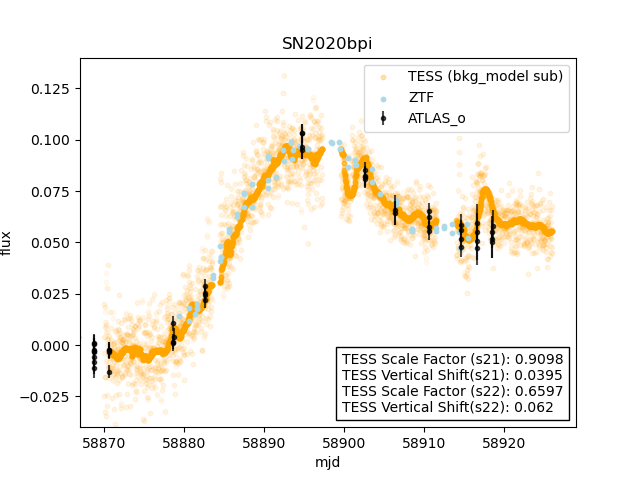

Text(0.5, 1.0, 'SN2020bpi')

In [23]:
##BKG_MODEL SUBTRACTED VERSION

# ax = sn2020bpi_ztf_r.plot(x='mjd',y='flux',color='navy',  
#                         kind='scatter',s=0)

#sn2020bpi_s21s22['temp'] = 2* sn2020bpi_s21s22['flux'] +.06
ax = sn2020bpi_s21s22.plot(x='mjd',y='flux_bkg_model_sub_scaled_2fit',  
                        color='orange',alpha=0.05,kind='scatter',s=10)
ax.set_xlim(sn2020bpi_s21s22.mjd.min()-3,sn2020bpi_s21s22.mjd.max()+3)
ax.set_ylim(-0.04,0.14)
ax.scatter(sn2020bpi_s21s22['mjd'], sn2020bpi_s21s22['flux_bkg_model_sub_scaled_2fit'].rolling(96).median(),
           color='orange',alpha=0.3,s=10,label='TESS (bkg_model sub)')
sn2020bpi_ztf_r.plot(x='mjd',y='flux',color='lightblue',  
                        kind='scatter',s=10,label='ZTF',ax=ax)
ax.errorbar(atlas_o.MJD,atlas_o.FLUXCAL * 1.3e-5,yerr=atlas_o.FLUXCALERR * 1.3e-5, 
            fmt='.k',color='purple',alpha=0.7,label='ATLAS_o')

# sn2020bpi_s21s22.plot(sn2020bpi_s21s22['mjd'], sn2020bpi_s21s22['flux_scaled_2fit'].rolling(96).median(),
#            color='purple',alpha=0.3,s=10,label='TESS (bkg_model sub)',ax=ax)
plt.legend(loc=1)
anchText_2fit = mpl.offsetbox.AnchoredText(np.str('TESS Scale Factor (s21): '+
                                                  np.str(np.around(fluxOptParams_bkg_s21.x[0],4))+
                                                  '\n'+'TESS Vertical Shift(s21): '+
                                                  np.str(np.around(fluxOptParams_bkg_s21.x[1],4))+
                                                  '\n'+'TESS Scale Factor (s22): '+
                                                  np.str(np.around(fluxOptParams_bkg_s22.x[0],4))+
                                                  '\n'+'TESS Vertical Shift(s22): '+
                                                  np.str(np.around(fluxOptParams_bkg_s22.x[1],4))),loc=4)
ax.add_artist(anchText_2fit)
ax.set_title('SN2020bpi')
#plt.savefig('sn2020bpi_full_flux_scaled_2fit300.png',dpi=300)

In [24]:
def sn2020bpi_flux_scale_bkg_add(params, fluxType, timeMin=0,timeMax=0):
    if params[2] <= 0:
        return -np.inf
    else:
        if timeMin !=0 and timeMax !=0:
            avg_ztf_err = [(0.5*(flux_Err[0]+flux_Err[1])) 
                           for flux_Err in sn2020bpi_ztf_r[(sn2020bpi_ztf_r.BTJD > timeMin) & (sn2020bpi_ztf_r.BTJD <timeMax)][np.str('sigflux')]]
            return ((sn2020bpi_ztf_r[(sn2020bpi_ztf_r.BTJD > timeMin) & (sn2020bpi_ztf_r.BTJD <timeMax)][np.str('flux')] - 
                    (params[0]*sn2020bpi_s21s22_interpolated[(sn2020bpi_ztf_r.BTJD > timeMin) & 
                                                             (sn2020bpi_ztf_r.BTJD <timeMax)][np.str(fluxType)] + params[1]
                     -params[2]*sn2020bpi_s21s22_interpolated[(sn2020bpi_ztf_r.BTJD > timeMin) & 
                                                             (sn2020bpi_ztf_r.BTJD <timeMax)]['bkg_model_flux']))/avg_ztf_err)
        elif timeMin ==0 and timeMax ==0:
            avg_ztf_err = [(0.5*(flux_Err[0]+flux_Err[1])) 
                           for flux_Err in sn2020bpi_ztf_r[np.str('sigflux')]]
            return ((sn2020bpi_ztf_r[np.str('flux')]) - 
                    (params[0]*sn2020bpi_s21s22_interpolated[np.str(fluxType)]+ params[1]
                    -params[2]*sn2020bpi_s21s22_interpolated['bkg_model_flux'])/avg_ztf_err)

In [25]:
fluxOptParams_s21_bkgScale = optimize.least_squares(sn2020bpi_flux_scale_bkg_add, x0=[0.3,.03,.05],
                                       args=('flux',
                                             sn2020bpi_s21s22['BTJD'].min(),
                                             sn2020bpi_s22_fixed['BTJD'].min()))
fluxOptParams_s22_bkgScale = optimize.least_squares(sn2020bpi_flux_scale_bkg_add, x0=[0.3,.03,.05],
                                       args=('flux',
                                             sn2020bpi_s22_fixed['BTJD'].min(),
                                             1912))

In [26]:
s21_bkg_frac_flux =pd.Series(fluxOptParams_s21_bkgScale.x[0]*
                                        sn2020bpi_s21s22[sn2020bpi_s21s22.BTJD<1900]['flux']+
                                        fluxOptParams_s21_bkgScale.x[1]-
                                     fluxOptParams_s21_bkgScale.x[2]*sn2020bpi_s21s22[sn2020bpi_s21s22.BTJD<1900]['bkg_model_flux'])
s22_bkg_frac_flux =pd.Series(fluxOptParams_s22_bkgScale.x[0]*
                                        sn2020bpi_s21s22[sn2020bpi_s21s22.BTJD>1900]['flux']+
                                        fluxOptParams_s22_bkgScale.x[1]-
                                     fluxOptParams_s22_bkgScale.x[2]*sn2020bpi_s21s22[sn2020bpi_s21s22.BTJD>1900]['bkg_model_flux'])
sn2020bpi_s21s22['flux_bkg_model_frac_2fit'] = pd.concat([s21_bkg_frac_flux,s22_bkg_frac_flux])
# sn2020bpi_s21s22['flux_bkg_model_frac_2fit']

In [27]:
s21_bkg_frac_flux_error =pd.Series(fluxOptParams_s21_bkgScale.x[0]*
                                        sn2020bpi_s21s22[sn2020bpi_s21s22.BTJD<1900]['flux_error'])
s22_bkg_frac_flux_error =pd.Series(fluxOptParams_s22_bkgScale.x[0]*
                                        sn2020bpi_s21s22[sn2020bpi_s21s22.BTJD>1900]['flux_error'])
sn2020bpi_s21s22['flux_error_bkg_model_frac_2fit'] = pd.concat([s21_bkg_frac_flux_error,s22_bkg_frac_flux_error])
#sn2020bpi_s21s22['flux_error_bkg_model_frac_2fit']

<IPython.core.display.Javascript object>


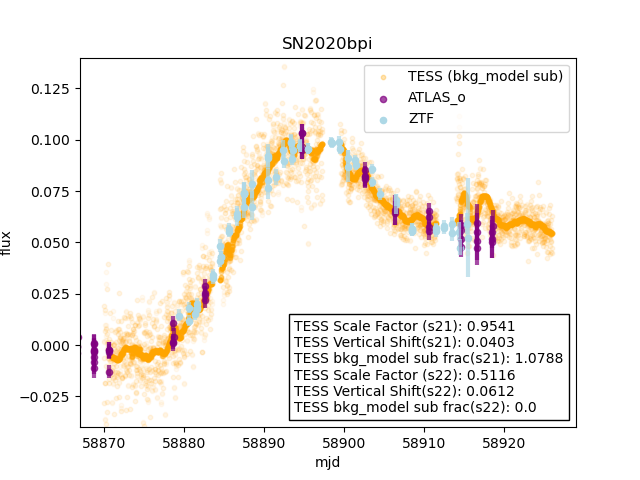

Text(0.5, 1.0, 'SN2020bpi')

In [28]:
##BKG_MODEL SCALE OPTIMIZATION VERSION

# fig,ax = plt.subplots(1,1)

#sn2020bpi_s21s22['temp'] = 2* sn2020bpi_s21s22['flux'] +.06
errorlinewidth= 3
marker_rad = 20
# ax.scatter(sn2020bpi_s21s22['mjd'],)
ax = sn2020bpi_s21s22.plot(x='mjd',y='flux_bkg_model_frac_2fit',  
                        color='orange',alpha=0.05,kind='scatter',s=10)
ax.set_xlim(sn2020bpi_s21s22.mjd.min()-3,sn2020bpi_s21s22.mjd.max()+3)
ax.set_ylim(-0.04,0.14)
ax.scatter(sn2020bpi_s21s22['mjd'][0::2], 
           sn2020bpi_s21s22['flux_bkg_model_frac_2fit'][0::2].rolling(48).median(),
           color='orange',alpha=0.3,s=10,label='TESS (bkg_model sub)')

ax.errorbar(atlas_o.MJD,atlas_o.FLUXCAL * 1.3e-5,yerr=atlas_o.FLUXCALERR * 1.3e-5, 
            linestyle='None',marker="None",
            ecolor='purple',linewidth=errorlinewidth,alpha=0.7)
ax.scatter(atlas_o.MJD,atlas_o.FLUXCAL * 1.3e-5, 
            color='purple',alpha=0.7,s=marker_rad,label='ATLAS_o')

sn2020bpi_ztf_r['fluxrange'] = [
    (sig[0]+flux,sig[1]+flux)
    for sig,flux in zip(sn2020bpi_ztf_r['sigflux'],sn2020bpi_ztf_r['flux'])
]

sn2020bpi_ztf_r.plot(x='mjd',y='flux',
                     color='lightblue',  
                        kind='scatter',s=marker_rad,label='ZTF',ax=ax)
ax.errorbar(sn2020bpi_ztf_r.mjd,
           sn2020bpi_ztf_r.flux,
            yerr= list(zip(*sn2020bpi_ztf_r["sigflux"])), 
            linestyle='None',marker="None",
            ecolor='lightblue',
            linewidth=errorlinewidth , alpha=0.7)

# sn2020bpi_s21s22.plot(sn2020bpi_s21s22['mjd'], sn2020bpi_s21s22['flux_scaled_2fit'].rolling(96).median(),
#            color='purple',alpha=0.3,s=10,label='TESS (bkg_model sub)',ax=ax)
plt.legend(loc=1)
anchText_2fit = mpl.offsetbox.AnchoredText(np.str('TESS Scale Factor (s21): '+
                                                  np.str(np.around(fluxOptParams_s21_bkgScale.x[0],4))+
                                                  '\n'+'TESS Vertical Shift(s21): '+
                                                  np.str(np.around(fluxOptParams_s21_bkgScale.x[1],4))+
                                                  '\n'+'TESS bkg_model sub frac(s21): '+
                                                  np.str(np.around(fluxOptParams_s21_bkgScale.x[2],4))+
                                                  '\n'+'TESS Scale Factor (s22): '+
                                                  np.str(np.around(fluxOptParams_s22_bkgScale.x[0],4))+
                                                  '\n'+'TESS Vertical Shift(s22): '+
                                                  np.str(np.around(fluxOptParams_s22_bkgScale.x[1],4))+
                                                 '\n'+'TESS bkg_model sub frac(s22): '+
                                                  np.str(np.around(fluxOptParams_s22_bkgScale.x[2],4))),
                                           loc=4)
ax.add_artist(anchText_2fit)
ax.set_title('SN2020bpi')
#plt.savefig('sn2020bpi_frac_flux_scaled_2fit300.png',dpi=300)
#sn2020bpi_ztf_r['flux'],sn2020bpi_ztf_r['sigflux'], sn2020bpi_ztf_r['fluxrange']

<IPython.core.display.Javascript object>


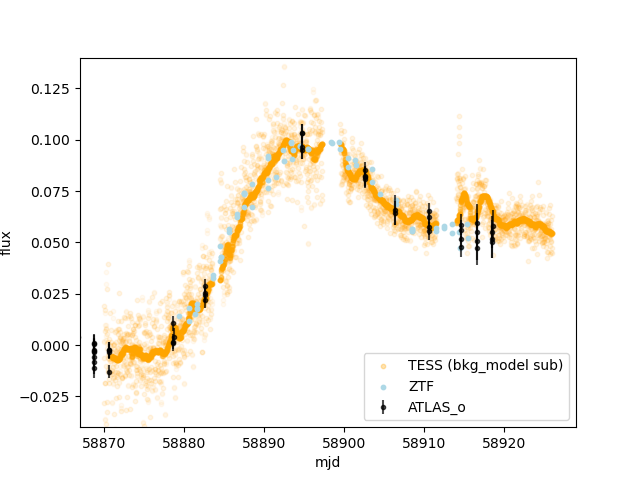

In [29]:
ax = sn2020bpi_s21s22.plot(x='mjd',y='flux_bkg_model_frac_2fit',  
                        color='orange',alpha=0.05,kind='scatter',s=10)
ax.set_xlim(sn2020bpi_s21s22.mjd.min()-3,sn2020bpi_s21s22.mjd.max()+3)
ax.set_ylim(-0.04,0.14)
ax.scatter(sn2020bpi_s21s22['mjd'][0::2], sn2020bpi_s21s22['flux_bkg_model_frac_2fit'][0::2].rolling(48).median(),
           color='orange',alpha=0.3,s=10,label='TESS (bkg_model sub)')
sn2020bpi_ztf_r.plot(x='mjd',y='flux',color='lightblue',  
                        kind='scatter',s=10,label='ZTF',ax=ax)

ax.errorbar(atlas_o.MJD,atlas_o.FLUXCAL * 1.3e-5,yerr=atlas_o.FLUXCALERR * 1.3e-5, 
            fmt='.k',color='purple',alpha=0.7,label='ATLAS_o')
ax.legend()

Note: scaling to bkg_model subtraction that is causing increase in spike at ~58915 are due to fitting from only the first cycle of s22

In [30]:
s21s22_Jha = pd.DataFrame()
s21s22_Jha['BTJD'] = sn2020bpi_s21s22['BTJD']
s21s22_Jha['mjd'] = sn2020bpi_s21s22['mjd']
s21s22_Jha['cts'] = sn2020bpi_s21s22['cts']
s21s22_Jha['e_cts'] = sn2020bpi_s21s22['e_cts']
s21s22_Jha['bkg_model'] = sn2020bpi_s21s22['bkg_model']
s21s22_Jha['raw_flux'] = sn2020bpi_s21s22['flux']
s21s22_Jha['e_raw_flux'] = sn2020bpi_s21s22['flux_error']
s21s22_Jha['bkg_model_flux'] = sn2020bpi_s21s22['bkg_model_flux']
s21s22_Jha['flux'] = sn2020bpi_s21s22['flux_bkg_model_frac_2fit']
s21s22_Jha['e_flux'] = sn2020bpi_s21s22['flux_error_bkg_model_frac_2fit']
# s21s22_Jha.to_csv('./JhaData/TESS_SN2020bpi.csv',index=False)

In [33]:
ztf_Jha = pd.DataFrame()
ztf_Jha['BTJD'] = sn2020bpi_ztf_r['BTJD']
ztf_Jha['mjd'] = sn2020bpi_ztf_r['mjd']
ztf_Jha['magap'] = sn2020bpi_ztf_r['magap']
ztf_Jha['sig_magap'] = sn2020bpi_ztf_r['sigmagap']
#ztf_Jha['sig_magap_corr'] = sn2020bpi_ztf_r['sigmagap_corr']
ztf_Jha['flux'] = sn2020bpi_ztf_r['flux']
ztf_Jha['e_flux'] = sn2020bpi_ztf_r['sigflux']
# ztf_Jha.to_csv('./JhaData/ztf_SN2020bpi.csv',index=False)